## Linear Regression in Action

We will implement and assess the performance of linear regression on an advertising dataset using external libraries
- The `sklearn` library provides functionalities for model building, training, prediction, and evaluation
- The `statsmodels` library is great for statistical summaries

Let's import the necessary libraries

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

from sklearn.model_selection import train_test_split  # To split our data into training and testing splits
from sklearn.linear_model import LinearRegression  # The primary linear regression model we want to fit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error  # Evaluation metrics

import statsmodels.formula.api as sm  # API for statsmodels

We will use an advertising-sales dataset, which contains the amount spent on advertising through 3 channels - TV, Radio, and Newspaper - and the resulting sales. Let's load and explore our dataset.

In [10]:
data_path = '~/Documents/Masters/AI-Projects/04-ML-Models/linear-regression/data/raw/'

In [11]:
df = pd.read_csv(data_path +'Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Before we proceed, let's divide the dataset into the predictors `X` and the target `y`. First, we will perform linear regression using a single predictor, and then expand it to multiple predictor variables.

In [12]:
X = df[['TV']]
y = df['Sales']

We will split the data into training and testing sets. The training set is used to fit the linear model, and predictions are then made on both sets to evaluate performance on known versus unseen data.

We can use `train_test_split()` from `sklearn.model_selection` to perform these splits

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  # Splitting the data into training:testing at 80:20

In [14]:
X_train.shape

(160, 1)

In [15]:
y_train.shape

(160,)

In [16]:
X_test.shape

(40, 1)

In [17]:
y_test.shape

(40,)

### Linear Regression Using Scikit-Learn
Let's apply scikit-learn's `LinearRegression()` to fit a linear model using ordinary least squares (OLS)

In [18]:
lr = LinearRegression()  # Initialising the model
lr.fit(X_train, y_train);  # Fitting the model to training data

This gives us the trained model `lr`. Let's now use the trained model to predict on our training data as well as our testing data.

In [19]:
y_train_pred = lr.predict(X_train)  # Predicting values on the training set
y_test_pred = lr.predict(X_test)  # Predicting values on the test set

In [20]:
pd.DataFrame({'Actual Train': y_train, 'Predicted Train': np.round(y_train_pred, 2)}).sample(5, random_state = 0)  # Training data

,Actual Train,Predicted Train
155,3.2,7.36
114,14.6,10.76
58,23.8,16.84
175,27.0,19.88
105,19.2,13.50


In [21]:
pd.DataFrame({'Actual Test': y_test, 'Predicted Test': np.round(y_test_pred, 2)}).sample(5, random_state = 0)  # Testing data

,Actual Test,Predicted Test
130,1.6,7.20
147,25.4,18.33
94,11.5,12.10
20,18.0,17.19
59,18.4,16.84


In [ ]:
def visualise_training_vs_testing_fit(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, predictor):
    target_name = y_train.name  # Target feature name
    plt.figure(figsize = (12, 3.5))
    x_min = min(X_train[predictor].min(), X_test[predictor].min()); x_max = max(X_train[predictor].max(), X_test[predictor].max()); y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min()); y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())  # Determine shared axis limits
    plt.subplot(1, 2, 1)  # Training subplot
    plt.scatter(X_train[predictor], y_train, color = 'blue', alpha = 0.6, s = 5, label = 'Actual'); 
    plt.scatter(X_train[predictor], y_train_pred, color = 'orange', alpha = 0.6, s = 5, label = 'Predicted'); plt.xlabel(predictor); plt.ylabel(target_name); plt.xlim(x_min, x_max); plt.ylim(y_min, y_max); plt.title('Training')
    plt.subplot(1, 2, 2)  # Testing subplot
    plt.scatter(X_test[predictor], y_test, color = 'blue', alpha = 0.6, s = 5, label = 'Actual'); 
    plt.scatter(X_test[predictor], y_test_pred, color = 'orange', alpha = 0.6, s = 5, label = 'Predicted'); plt.xlabel(predictor); plt.ylabel(''); plt.xlim(x_min, x_max); plt.ylim(y_min, y_max); plt.yticks([]); plt.title('Testing'); plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right')
    plt.suptitle(f'Actual vs Predicted Charges by {predictor}')
    plt.tight_layout();

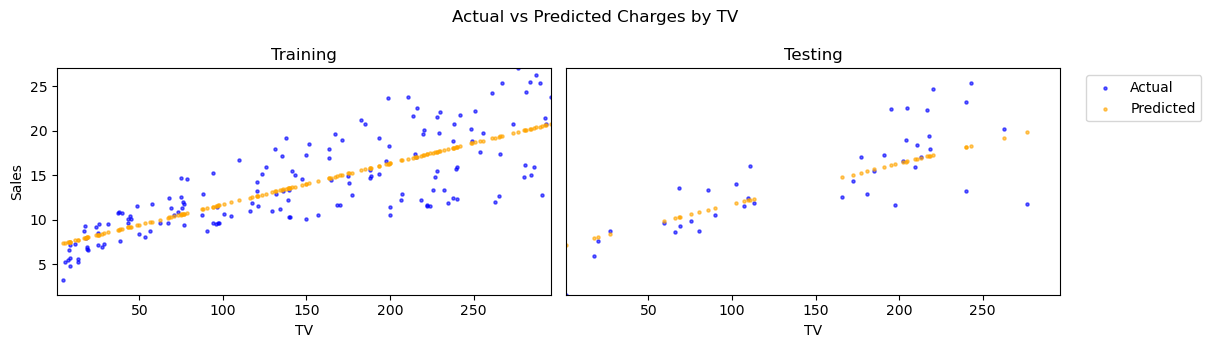

In [23]:
# Visualising actual vs predicted target versus against the 'TV' predictor
visualise_training_vs_testing_fit(X_train, y_train, y_train_pred, X_test, y_test, y_test_pred, 'TV')

Upon first glance, it feels like the regression line achieved upon training our data has generalised well for the test set. To verify this, we would need to compute some evaluation metrics.

### Evaluation Metrics
Let's evaluate our model by computing and analysing various metrics such as the mean squared error (MSE), the root mean squared error (RMSE), the mean absolute error (MAE), and the $R^2$ score. `sklearn.metrics` provides us with functions to do this.

In [24]:
def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):    
    def compute_metrics(y, y_pred):
        # Compute evaluation metrics
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        mape = mean_absolute_percentage_error(y, y_pred) * 100
        r2 = r2_score(y, y_pred)

        # Compute statistics for comparison
        var = y.var()  # Compares to the MSE
        std = y.std()  # Compares to the RMSE
        mean_val = y.mean()  # Acts as the 'typical value' when comparing to the MAE
        
        return mse, var, rmse, std, mae, mean_val, mape, r2

    metrics_train = compute_metrics(y_train, y_train_pred)
    metrics_test = compute_metrics(y_test, y_test_pred)
    
    return pd.DataFrame({'Dataset': ['Training', 'Testing'], 'MSE': [metrics_train[0], metrics_test[0]], 'Var': [metrics_train[1], metrics_test[1]],
                         'RMSE': [metrics_train[2], metrics_test[2]], 'Std Dev': [metrics_train[3], metrics_test[3]],
                         'MAE': [metrics_train[4], metrics_test[4]], 'Mean': [metrics_train[5], metrics_test[5]],'MAPE': [metrics_train[6], metrics_test[6]], 
                         'R²': [metrics_train[7], metrics_test[7]]}).set_index('Dataset')

In [25]:
df_metrics = regression_metrics(y_train, y_train_pred, y_test, y_test_pred).round(2)
df_metrics

,MSE,Var,RMSE,Std Dev,MAE,Mean,MAPE,R²
Dataset,,,,,,,,
Training,10.33,26.78,3.21,5.17,2.58,13.87,19.72,0.61
Testing,11.39,29.26,3.38,5.41,2.50,14.63,24.18,0.60


Here are some thumb rules when it comes to evaluating our metrics

| Metric | Thumb Rule / Interpretation |
|--------|----------------------------|
| MSE | MSE lower than variance means model improves over naïve prediction |
| RMSE | RMSE lower than standard deviation indicates good fit |
| MAE | Compare to typical value (e.g., the mean) of target: roughly tells typical error magnitude; lower is better |
| MAPE | Interprets error as % of true value; smaller % is better |
| $R^2$ | Proportion of variance explained: closer to 1 is better; 0 means no improvement over mean |



We can see that
- The MSE is smaller than the variance and the RMSE is smaller than the standard deviation; this shows low prediction error compared to data variability
- The MAE is much smaller than the mean, confirming accurate predictions
- The MAPE indicates that performance is average
- The suboptimal $R^2$ values indicate that only one predictor may not be enough to explain most of the variance

Across the board, we can see our error metrics worsening for the testing set; however, the MAE and $R^2$ are slightly better on the testing set than on training, suggesting that, despite higher absolute errors, the model may be capturing the overall trend in the unseen data reasonably well

Let's visualise our residuals

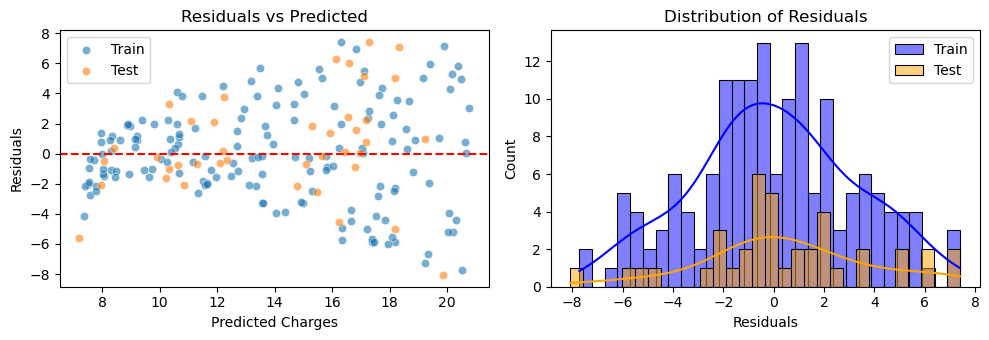

In [26]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))
# Residuals vs predicted target values 
sns.scatterplot(x = y_train_pred, y = residuals_train, ax = axes[0], label = 'Train', alpha = 0.6)
sns.scatterplot(x = y_test_pred, y = residuals_test, ax = axes[0], label = 'Test', alpha = 0.6)
axes[0].axhline(0, color = 'red', linestyle = '--'); axes[0].set_xlabel('Predicted Charges'); axes[0].set_ylabel('Residuals'); axes[0].set_title('Residuals vs Predicted'); axes[0].legend()
# Residuals distribution 
sns.histplot(residuals_train, kde = True, bins = 30, ax = axes[1], color = 'blue', label = 'Train', alpha = 0.5)
sns.histplot(residuals_test, kde = True, bins = 30, ax = axes[1], color = 'orange', label = 'Test', alpha = 0.5)
axes[1].set_xlabel('Residuals'); axes[1].set_title('Distribution of Residuals'); axes[1].legend(); plt.tight_layout()

The residuals show a slight funnel pattern, suggesting heteroscedasticity, indicating that the linear model may not be fully capturing relationships in the data. The residual distribution is somewhat normally distributed.

### Linear Regression using Multiple Predictors

Let us now extend our model to multiple linear regression and see if it can capture the realtionships better

In [27]:
X_mlr = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_mlr_train, X_mlr_test, y_train, y_test = train_test_split(X_mlr, y, test_size = 0.20)
X_mlr_train.head()

,TV,Radio,Newspaper
3,151.5,41.3,58.5
127,80.2,0.0,9.2
38,43.1,26.7,35.1
101,296.4,36.3,100.9
160,172.5,18.1,30.7


In [28]:
mlr = LinearRegression()  # Initialising the model
mlr.fit(X_mlr_train, y_train);  # Fitting the model to training data

y_train_pred_mlr = mlr.predict(X_mlr_train)  # Predicting values on the training set
y_test_pred_mlr = mlr.predict(X_mlr_test)  # Predicting values on the test set

In [29]:
pd.DataFrame({'Actual Train': y_train, 'Predicted Train': np.round(y_train_pred_mlr, 2)}).sample(5, random_state = 0)  # Training data

,Actual Train,Predicted Train
34,9.5,7.60
54,20.2,20.35
103,14.7,14.75
194,17.3,16.74
116,12.2,11.99


In [30]:
pd.DataFrame({'Actual Test': y_test, 'Predicted Test': np.round(y_test_pred_mlr, 2)}).sample(5, random_state = 0)  # Testing data

,Actual Test,Predicted Test
138,9.6,10.04
135,11.6,14.49
45,14.9,15.16
130,1.6,10.93
97,15.5,15.34


Let's visualise our data; as we now have multiple dimensions, let's just view `'Sales'` against `'TV'`

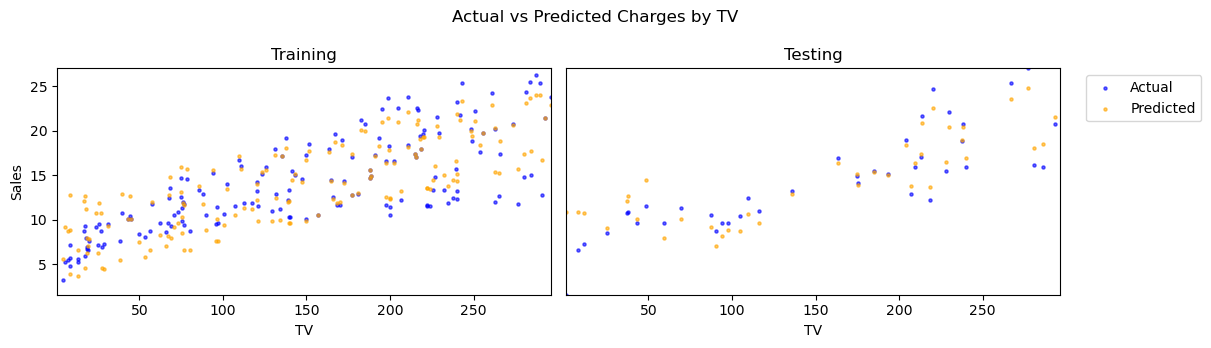

In [31]:
# Visualising actual vs predicted target versus against the 'TV' predictor
visualise_training_vs_testing_fit(X_mlr_train, y_train, y_train_pred_mlr, X_mlr_test, y_test, y_test_pred_mlr, 'TV')

We can see that the predictions seem a lot closer to the actual values in this case. The predictions don't follow a straight line here as our dataset is in 4D: we are fitting a hyperplane whose projections are what you see in the 2D case.

Let's calculate the evaluation metrics next

In [32]:
df_metrics = regression_metrics(y_train, y_train_pred_mlr, y_test, y_test_pred_mlr).round(2)
df_metrics

,MSE,Var,RMSE,Std Dev,MAE,Mean,MAPE,R²
Dataset,,,,,,,,
Training,2.37,26.66,1.54,5.16,1.17,13.95,11.26,0.91
Testing,4.63,30.10,2.15,5.49,1.48,14.29,25.21,0.84


Going by the $R^2$ score, we can see that the performance of our model has improved significantly after adding the additional predictors. The model seems to be performing consistently across the training and testing sets.

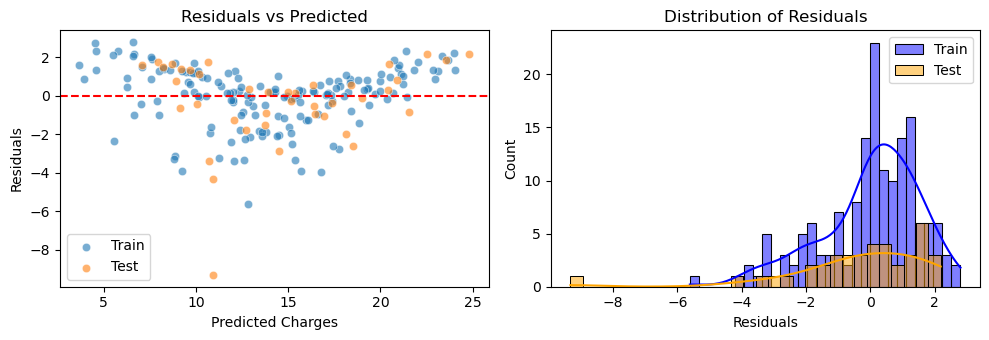

In [33]:
residuals_train_mlr = y_train - y_train_pred_mlr
residuals_test_mlr = y_test - y_test_pred_mlr
fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))
# Residuals vs predicted target values 
sns.scatterplot(x = y_train_pred_mlr, y = residuals_train_mlr, ax = axes[0], label = 'Train', alpha = 0.6)
sns.scatterplot(x = y_test_pred_mlr, y = residuals_test_mlr, ax = axes[0], label = 'Test', alpha = 0.6)
axes[0].axhline(0, color = 'red', linestyle = '--'); axes[0].set_xlabel('Predicted Charges'); axes[0].set_ylabel('Residuals'); axes[0].set_title('Residuals vs Predicted'); axes[0].legend()
# Residuals distribution 
sns.histplot(residuals_train_mlr, kde = True, bins = 30, ax = axes[1], color = 'blue', label = 'Train', alpha = 0.5)
sns.histplot(residuals_test_mlr, kde = True, bins = 30, ax = axes[1], color = 'orange', label = 'Test', alpha = 0.5)
axes[1].set_xlabel('Residuals'); axes[1].set_title('Distribution of Residuals'); axes[1].legend(); plt.tight_layout()

The residuals still show some non-random patterns, and the residual distribution is not normally distributed. To deal with these kinds of issues, we need to tackle challenges that come about when the assumptions of linear regression are violated.

### Linear Regression Using Statsmodels

The `statsmodels` library offers a detailed statistical summary, making it ideal for inferential analysis like hypothesis testing and evaluating predictor significance

In [34]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

sm_model = sm.ols('Sales ~ TV + Radio + Newspaper', data = train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.53e-76
Time:                        22:15:05   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9791      0.354      8.427      0.0

#### Interpretation
- Null hypothesis is "Coeff is not significant"
- Alternate hypothesis is "Coeff is significant"
- p-value < 0.05 for TV and Radio means we reject null hypothesis. Hence TV is significant predictor of sales

📌 1. TV (coef = 0.0447, p ≈ 0.000) Interpretation:
- The p-value is extremely small (≈ 0).
- This means the probability that TV’s coefficient is zero is essentially zero.
- TV advertising has a highly significant, strong, positive effect on Sales.

✔ Conclusion:
- ➡ TV spending is a very important predictor of Sales.
- ➡ Increasing TV budget increases sales with extremely high statistical confidence.

📌 2. Radio (coef = 0.1892, p ≈ 0.000) Interpretation:
- Like TV, the p-value is extremely small.
- Radio advertising is also strongly statistically significant.
- Its effect is positive and meaningful (the coefficient is ~4x larger than TV).

✔ Conclusion:
- ➡ Radio spending is also a major driver of Sales, with extremely strong evidence.

📌 3. Newspaper (coef = 0.0028, p = 0.696) Interpretation:
- p = 0.696 is very large.
- This means there is no statistical evidence that Newspaper advertising has any impact.
- The coefficient is tiny and its confidence interval spans zero: [−0.011,0.017]
- The variable is basically noise for this model.

✔ Conclusion:
- ➡ Newspaper advertising does not significantly influence Sales.
- ➡ Likely should be removed from the model.

Unlike `sklearn`, here we get a detailed statistical insights, such as p-values and the degrees of freedom, in one place, making it more suited for inference

For example, all the p-values (`P>|t|`) being $<0.05$ indicate statistical significance, meaning we can be at least $95\%$ confident that our variables are important predictors of the target

Let's compare the predictions for `sklearn` and `statsmodels`

In [35]:
y_train = train['Sales']
X_train = train[['TV', 'Radio', 'Newspaper']]

y_test = test['Sales']
X_test = test[['TV', 'Radio', 'Newspaper']]

y_pred_sm_train = sm_model.predict(train)
y_train_pred_mlr = mlr.predict(X_train)

y_pred_sm_test = sm_model.predict(test)
y_test_pred_mlr = mlr.predict(X_test)

In [36]:
pd.DataFrame({'Actual Train': y_train, 'Predicted Train (sklearn)': np.round(y_train_pred_mlr, 2), 'Predicted Train (statsmodels)': np.round(y_pred_sm_train, 2)}).sample(5, random_state = 42)  # Training data

,Actual Train,Predicted Train (sklearn),Predicted Train (statsmodels)
34,9.5,7.60,7.54
91,7.3,4.54,4.63
52,22.6,20.74,20.66
194,17.3,16.74,16.43
43,12.9,13.81,13.90


In [37]:
pd.DataFrame({'Actual Test': y_test, 'Predicted Test (sklearn)': np.round(y_test_pred_mlr, 2), 'Predicted Test (statsmodels)': np.round(y_pred_sm_test, 2)}).sample(5, random_state = 42)  # Testing data

,Actual Test,Predicted Test (sklearn),Predicted Test (statsmodels)
68,18.9,19.00,18.83
56,5.5,8.80,8.74
177,11.7,12.03,12.16
84,21.7,20.89,20.76
128,24.7,22.52,22.11


As the ordinary least squares (OLS) method is used by both libraries, and this method is deterministic, we can expect the predictions to be similar